<a href="https://colab.research.google.com/github/codehacker4655/ML-with-theory-inform-of-comments-/blob/main/Naive_Baye's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ======================================
# NAIVE BAYES AND FEATURE INDEPENDENCE
# ======================================

# 1) Naïve Bayes makes a "Naïve" assumption:
#    -> Features (x1, x2, ..., xn) are conditionally independent given the class (Y).
#    -> Formula:
#          P(x1, x2, ..., xn | Y) = P(x1|Y) * P(x2|Y) * ... * P(xn|Y)
#    -> This simplification makes the math and computation very easy.

# 2) Why independence matters:
#    - If features are NOT independent, Naïve Bayes will double-count their effect.
#    - Example:
#        Feature 1 = Height
#        Feature 2 = Weight
#        Outcome = Athletic?
#      -> Height and Weight are correlated.
#      -> Naïve Bayes multiplies P(Height|Y) * P(Weight|Y), exaggerating their importance.
#      -> This leads to biased / less accurate predictions.

# 3) When Naïve Bayes works well:
#    - When features are "almost independent".
#    - Example: Text classification (spam filtering, sentiment analysis).
#      -> Each word is treated as a feature.
#      -> Words are not fully independent, but assumption works well enough.

# 4) When NOT to use Naïve Bayes:
#    - If features are strongly dependent or correlated.
#    - In such cases, models like Logistic Regression or SVM will perform better.

# ======================================
# COMPARISON TABLE: CLASSIFIERS
# ======================================

# | Model              | Strengths                                                    | Weaknesses                                             |
# |--------------------|-------------------------------------------------------------|-------------------------------------------------------|
# | Naïve Bayes        | Simple, fast, works well for text data (spam, sentiment).   | Requires independent features, struggles with correlation. |
# | Logistic Regression| Probabilistic, interpretable, handles linear boundaries.    | Sensitive to outliers, cannot handle overlapping data well. |
# | SVM                | Works well with small datasets, maximizes margin, robust to outliers (with kernels). | Training can be slow on large datasets, harder to interpret. |
# | Lasso Regression   | Performs feature selection automatically (shrinks some to 0). | May drop important but correlated features.            |
# | Ridge Regression   | Handles multicollinearity better by shrinking coefficients. | Does not perform feature selection.                   |
# | ElasticNet         | Combination of Lasso + Ridge, balances selection + shrinkage. | Requires tuning of two parameters (alpha, l1_ratio).   |

In [2]:
# ======================================
# NAÏVE BAYES CLASSIFIER: THEORY + MATH
# ======================================

# 1) Goal:
#    - Predict the probability of a class Y given features X = (x1, x2, ..., xn).
#    - We use Bayes Theorem:
#         P(Y|X) = [ P(Y) * P(X|Y) ] / P(X)

# 2) Independence Assumption ("Naïve"):
#    - Naïve Bayes assumes features are independent given the class.
#    - This simplifies:
#         P(X|Y) = P(x1, x2, ..., xn | Y)
#               = P(x1|Y) * P(x2|Y) * ... * P(xn|Y)
#    - That’s why it’s called "Naïve".

# ======================================
# TRAINING PROCESS
# ======================================
# Step 1: Calculate Prior Probabilities
#         P(Y=class) = (count of samples in class) / (total samples)

# Step 2: Calculate Likelihoods
#         For each feature xi:
#             P(xi | Y=class) = (count of feature xi in class) / (total samples in class)

# Step 3: Build the Model
#         Store these priors and likelihoods.

# Step 4: Prediction
#         For a new sample (x1, x2, ..., xn):
#            Compute for each class:
#                score(class) = P(Y=class) * P(x1|class) * P(x2|class) * ... * P(xn|class)
#            Choose class with highest score.

# ======================================
# MATH EXAMPLE
# ======================================
# Dataset: Classify whether email is SPAM or NOT SPAM using two words as features:
#   Features: x1 = "Free", x2 = "Win"
#
# Training Data:
#   SPAM emails: 3
#     - "Free Win", "Free", "Win"
#   NOT SPAM emails: 2
#     - "Hello", "Meeting"
#
# Step 1: Priors
#   P(SPAM) = 3/5 = 0.6
#   P(NOT SPAM) = 2/5 = 0.4
#
# Step 2: Likelihoods (word counts with Laplace smoothing)
#   P("Free"|SPAM) = 2/3 , P("Win"|SPAM) = 2/3
#   P("Free"|NOT SPAM) = 0/2 = 0 , P("Win"|NOT SPAM) = 0/2 = 0
#   (after smoothing, small non-zero values are used)
#
# Step 3: Prediction
#   New email = "Free Win"
#
#   For SPAM:
#     Score = P(SPAM) * P("Free"|SPAM) * P("Win"|SPAM)
#           = 0.6 * (2/3) * (2/3) ≈ 0.27
#
#   For NOT SPAM:
#     Score = P(NOT SPAM) * P("Free"|NOT SPAM) * P("Win"|NOT SPAM)
#           = 0.4 * (tiny values from smoothing)
#           ≈ very small
#
#   Result: Predict SPAM ✅
#
# ======================================
# SUMMARY
# ======================================
# - Naïve Bayes works by multiplying probabilities of features given a class.
# - Strong assumption: features must be conditionally independent given class.
# - Training is very fast: just count priors + conditional probabilities.
# - Prediction: compute product of probabilities for each class and pick the max.
# - Works well in text classification (spam, sentiment).
# - Fails if features are highly dependent (like Height & Weight together).

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [4]:
X,y=load_iris(return_X_y=True)#it will just say to return your independent and dependent feature

In [5]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
from sklearn.naive_bayes import GaussianNB


In [7]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [8]:
y_pred=gnb.predict(x_test)

In [9]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [10]:
print(accuracy_score(y_pred,y_test))

1.0


In [11]:
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [12]:
import seaborn as sns


In [13]:
df=sns.load_dataset('tips')

In [14]:
df.shape

(244, 7)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [16]:
df['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [17]:
df['sex']=df['sex'].apply(lambda x:1 if x=="Male" else 0)

In [18]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [19]:
df['sex']=df['sex'].astype(int)

In [20]:
df.duplicated().sum()

np.int64(1)

In [21]:
df=df[~df.duplicated()]

In [22]:
df.shape

(243, 7)

In [23]:
df['smoker'].unique()

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

In [24]:
df['smoker']=df['smoker'].apply(lambda x:1 if x=="Yes" else 0)

In [25]:
df['smoker']=df['smoker'].astype(int)

In [26]:
df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [27]:
df['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  243 non-null    float64 
 1   tip         243 non-null    float64 
 2   sex         243 non-null    int64   
 3   smoker      243 non-null    int64   
 4   day         243 non-null    category
 5   time        243 non-null    category
 6   size        243 non-null    int64   
dtypes: category(2), float64(2), int64(3)
memory usage: 12.2 KB


In [30]:
df['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [32]:
import pandas as pd
df = pd.get_dummies(df, columns=['day', 'time'], dtype=int)
display(df.head())

,total_bill,tip,sex,smoker,size,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,0,0,2,0,0,0,1,0,1
1,10.34,1.66,1,0,3,0,0,0,1,0,1
2,21.01,3.50,1,0,3,0,0,0,1,0,1
3,23.68,3.31,1,0,2,0,0,0,1,0,1
4,24.59,3.61,0,0,4,0,0,0,1,0,1


In [33]:
df

,total_bill,tip,sex,smoker,size,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,0,0,2,0,0,0,1,0,1
1,10.34,1.66,1,0,3,0,0,0,1,0,1
2,21.01,3.50,1,0,3,0,0,0,1,0,1
3,23.68,3.31,1,0,2,0,0,0,1,0,1
4,24.59,3.61,0,0,4,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,3,0,0,1,0,0,1
240,27.18,2.00,0,1,2,0,0,1,0,0,1
241,22.67,2.00,1,1,2,0,0,1,0,0,1
242,17.82,1.75,1,0,2,0,0,1,0,0,1


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   total_bill   243 non-null    float64
 1   tip          243 non-null    float64
 2   sex          243 non-null    int64  
 3   smoker       243 non-null    int64  
 4   size         243 non-null    int64  
 5   day_Thur     243 non-null    int64  
 6   day_Fri      243 non-null    int64  
 7   day_Sat      243 non-null    int64  
 8   day_Sun      243 non-null    int64  
 9   time_Lunch   243 non-null    int64  
 10  time_Dinner  243 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 22.8 KB


In [35]:
df.corr()

,total_bill,tip,sex,smoker,size,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
total_bill,1.000000,0.674998,0.141350,0.090136,0.597589,-0.133758,-0.087201,0.052703,0.121096,-0.179232,0.179232
tip,0.674998,1.000000,0.085274,0.009763,0.488400,-0.091433,-0.056398,-0.005016,0.123360,-0.117596,0.117596
sex,0.141350,0.085274,1.000000,0.009930,0.083248,-0.186796,-0.072950,0.050085,0.165155,-0.198129,0.198129
smoker,0.090136,0.009763,0.009930,1.000000,-0.130564,-0.138821,0.246709,0.160366,-0.178861,-0.063911,0.063911
size,0.597589,0.488400,0.083248,-0.130564,1.000000,-0.068834,-0.143033,-0.043040,0.191713,-0.100045,0.100045
day_Thur,-0.133758,-0.091433,-0.186796,-0.138821,-0.068834,1.000000,-0.168609,-0.432341,-0.390551,0.917076,-0.917076
day_Fri,-0.087201,-0.056398,-0.072950,0.246709,-0.143033,-0.168609,1.000000,-0.217495,-0.196472,0.060416,-0.060416
day_Sat,0.052703,-0.005016,0.050085,0.160366,-0.043040,-0.432341,-0.217495,1.000000,-0.503786,-0.460764,0.460764
day_Sun,0.121096,0.123360,0.165155,-0.178861,0.191713,-0.390551,-0.196472,-0.503786,1.000000,-0.416226,0.416226
time_Lunch,-0.179232,-0.117596,-0.198129,-0.063911,-0.100045,0.917076,0.060416,-0.460764,-0.416226,1.000000,-1.000000


<Axes: >

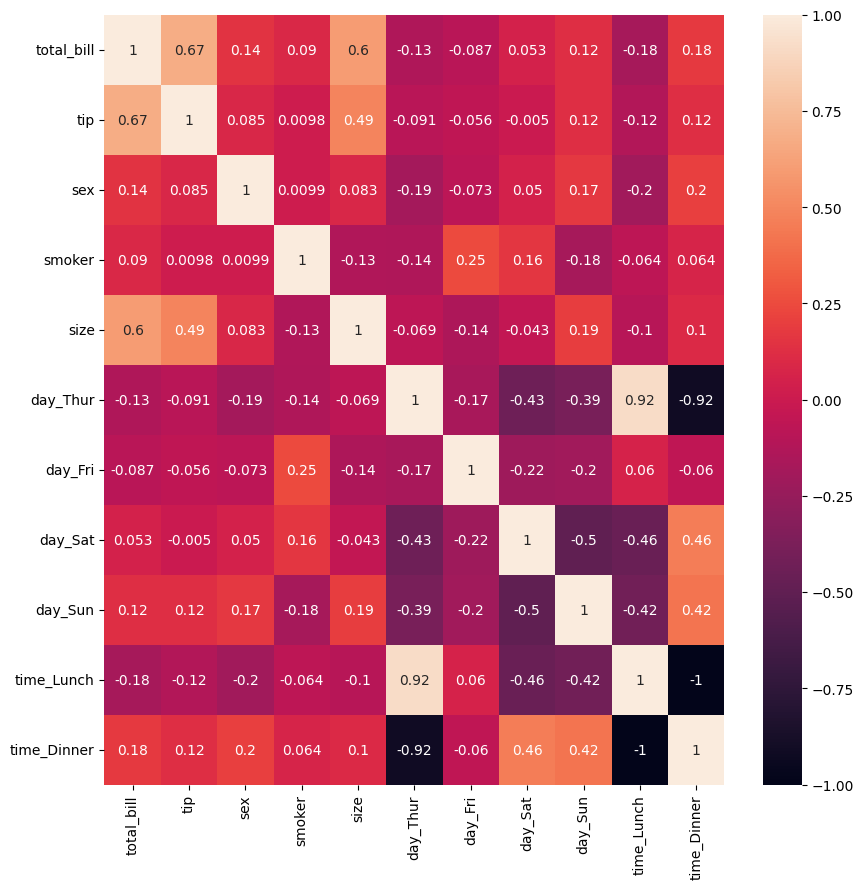

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)